# Instrucciones:
● Deben unirse a uno de los grupos de Canvas de nombre “Laboratorio 7 #”, donde N es un número entre 1 y 23. Los grupos pueden ser de 2 o 3 personas. <br/>
● Esta actividad debe realizarse en grupos.<br/>
● Sólo es necesario que una persona del grupo suba el trabajo a Canvas.<br/>
● No se permitirá ni se aceptará cualquier indicio de copia. De presentarse, se procederá según el reglamento correspondiente. <br/>
# Task 1 - Práctica
Considere las arquitecturas conversadas durante la clase, con ello realice una implementación de dos arquitecturas
usando PyTorch
1. Implemente la arquitectura de LeNet-5 para resolver el problema de clasificación del daset de dígitos escritos a mano llamado mnist dataset



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

2. Implemente la arquitectura de AlexNet para resolver el problema de clasificación usando el dataset de imagenes llamado CIFAR10 dataset. Para cada implementación defina y justifique (dentro del notebook) una métrica de desempeño. Además respond (en su notebook), recuerde justificar y/o expandir su respuesta:

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = AlexNet()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 5 

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Época [{epoch + 1}, {i + 1}] - Pérdida: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Entrenamiento completado')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Precisión en el conjunto de pruebas: {100 * correct / total:.2f}%')


Files already downloaded and verified
Files already downloaded and verified
Época [1, 100] - Pérdida: 2.302
Época [1, 200] - Pérdida: 2.297
Época [1, 300] - Pérdida: 2.099
Época [2, 100] - Pérdida: 1.729
Época [2, 200] - Pérdida: 1.561
Época [2, 300] - Pérdida: 1.492
Época [3, 100] - Pérdida: 1.327
Época [3, 200] - Pérdida: 1.280
Época [3, 300] - Pérdida: 1.198
Época [4, 100] - Pérdida: 1.036
Época [4, 200] - Pérdida: 1.018
Época [4, 300] - Pérdida: 0.967
Época [5, 100] - Pérdida: 0.877
Época [5, 200] - Pérdida: 0.826
Época [5, 300] - Pérdida: 0.827
Entrenamiento completado
Precisión en el conjunto de pruebas: 68.56%


a. ¿Cuál es la diferencia principal entre ambas arquitecturas?<br/>

Aunque ambas son dos arquitecturas de redes neuronales convolucionales (CNN) clave en la historia del aprendizaje profundo. LeNet-5 es más antigua y simple, con capas convolucionales y pooling. AlexNet, más avanzada, tiene capas convolucionales más profundas, más parámetros y usa técnicas como ReLU y dropout, logrando un rendimiento superior en tareas de visión por computadora.

b. ¿Podría usarse LeNet-5 para un problema como el que resolvió usando AlexNet? ¿Y viceversa?<br/>


Sí, es posible utilizar LeNet-5 para problemas que AlexNet puede resolver y viceversa. Sin embargo, la elección depende de la complejidad del problema y el tamaño del conjunto de datos. AlexNet, con su mayor capacidad, es más adecuado para problemas complejos y grandes conjuntos de datos, mientras que LeNet-5 es más apropiado para problemas más simples o conjuntos de datos más pequeños. La elección de la arquitectura debe basarse en la naturaleza del problema y la capacidad de la red para capturar las características necesarias.

c. Indique claramente qué le pareció más interesante de cada arquitectura

Me parece interesante que LeNet-5 es una pionera en redes neuronales convolucionales (CNN) y que se destaca en el reconocimiento de caracteres manuscritos, introduciendo capas convolucionales y de pooling. Por otro lado, AlexNet revitalizó las CNN mediante el uso de capas profundas usando técnicas de regularización como dropout.

d. Aclaracion de uso de precision:

El uso de precisión como medida de evaluación en AlexNet es viable porque CIFAR-10 es un conjunto de datos de clasificación, y la precisión mide directamente la proporción de predicciones correctas, lo que es relevante y fácil de interpretar en este contexto.


## Parte 2

### GoogleNet 🚀 (Inception)

GoogleNet, también conocido como Inception, es una arquitectura de red neuronal convolucional (CNN) que se ha destacado por su eficiencia y precisión en la clasificación de imágenes. 💡

**Utilidad**: GoogleNet es especialmente útil en los siguientes casos:

#### 1. Clasificación de Imágenes de Alta Precisión 📷

Esta arquitectura es ideal cuando se requiere una precisión excepcional en la clasificación de imágenes. Sus módulos Inception permiten capturar y aprender características relevantes a diferentes escalas, lo que mejora la capacidad de la red para reconocer patrones complejos en las imágenes. Esto es beneficioso en aplicaciones como diagnóstico médico por imágenes o identificación de objetos.

#### 2. Eficiencia Computacional 💻

GoogleNet está diseñado para ser eficiente en términos de uso de recursos computacionales. Su estructura de módulos Inception reduce el costo computacional en comparación con otras arquitecturas más profundas y densas, lo que la hace adecuada para implementaciones en dispositivos móviles o en entornos con recursos limitados.

#### 3. Detección de Objetos y Segmentación Semántica 🎯

Además de la clasificación de imágenes, GoogleNet se puede adaptar para tareas de detección de objetos y segmentación semántica. La capacidad de aprender representaciones a diferentes escalas hace que sea eficaz para localizar objetos en imágenes y etiquetar píxeles en la segmentación semántica.

#### 4. Transferencia de Aprendizaje 🔄

GoogleNet, entrenado previamente en conjuntos de datos masivos como ImageNet, se presta bien para la transferencia de aprendizaje. Esto significa que los modelos preentrenados de GoogleNet se pueden ajustar para tareas específicas con conjuntos de datos más pequeños, acelerando el proceso de entrenamiento y mejorando el rendimiento.

La arquitectura Inception fue introducida por Google en el artículo "Going Deeper with Convolutions" (Szegedy et al., 2015) y posteriormente mejorada en "Rethinking the Inception Architecture for Computer Vision" (Szegedy et al., 2016). Estas referencias proporcionan información detallada sobre la arquitectura y su eficacia en diversas aplicaciones de visión por computadora.


Referencias:
- Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., ... & Rabinovich, A. (2015). Going deeper with convolutions. In Proceedings of the IEEE conference on computer vision and pattern recognition (CVPR) (pp. 1-9).
- Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the inception architecture for computer vision. In Proceedings of the IEEE conference on computer vision and pattern recognition (CVPR) (pp. 2818-2826).


### DenseNet 🌟

DenseNet, o Dense Convolutional Network, es una arquitectura de red neuronal convolucional (CNN) que se destaca por su eficiencia y rendimiento en tareas de clasificación y segmentación en conjuntos de datos de imágenes pequeñas a medianas. 📸🤖

**Utilidad**: DenseNet es particularmente útil en los siguientes casos:

#### 1. Clasificación de Imágenes y Segmentación 📊

DenseNet brilla en tareas de clasificación y segmentación de imágenes. Su característica distintiva es la conexión densa entre capas, donde cada capa recibe entradas de todas las capas anteriores. Esto se conoce como "densamente conectado" y mejora la propagación del gradiente a lo largo de la red. Como resultado, DenseNet aprende características de manera más eficiente y efectiva, lo que es beneficioso en aplicaciones que requieren una comprensión profunda de las imágenes.

#### 2. Eficiencia Paramétrica 📈

Una ventaja clave de DenseNet es su eficiencia paramétrica. A pesar de ser modelos más profundos que algunas arquitecturas convolucionales tradicionales, DenseNet tiene menos parámetros debido a la compartición de características entre capas. Esto reduce el riesgo de sobreajuste y permite entrenar modelos más grandes sin un aumento exponencial en la cantidad de parámetros.

#### 3. Transferencia de Aprendizaje 🔄

DenseNet es adecuado para la transferencia de aprendizaje, donde los modelos preentrenados se adaptan a tareas específicas. La estructura densamente conectada permite que los modelos preentrenados capturen una amplia gama de características, lo que facilita la adaptación a diferentes conjuntos de datos.

#### 4. Redes Profundas sin Degradación 🏋️

A diferencia de algunas arquitecturas, como las redes residuales (ResNet), donde agregar capas adicionales puede llevar a problemas de degradación de gradientes, DenseNet no sufre de este problema. De hecho, añadir más capas a una red DenseNet puede resultar en un mejor rendimiento, siempre y cuando se gestione el crecimiento de los canales correctamente.

DenseNet fue presentado en el artículo "Densely Connected Convolutional Networks" (Huang et al., 2017), que detalla su estructura y su eficacia en diversas tareas de visión por computadora.



Referencia:
- Huang, G., Liu, Z., Van Der Maaten, L., & Weinberger, K. Q. (2017). Densely connected convolutional networks. In Proceedings of the IEEE conference on computer vision and pattern recognition (CVPR) (pp. 4700-4708).


### MobileNet 📱

MobileNet es una arquitectura de red neuronal convolucional (CNN) diseñada para aplicaciones móviles y en tiempo real. 🚀📸

**Utilidad**: MobileNet es especialmente útil en los siguientes casos:

#### 1. Aplicaciones Móviles y Tiempo Real 📱⏱️

MobileNet está optimizado para ser rápido y liviano, lo que lo hace ideal para aplicaciones en dispositivos móviles y en tiempo real. Su diseño eficiente permite realizar clasificaciones en tiempo real incluso en dispositivos con recursos de computación limitados. Esto lo convierte en una elección popular para aplicaciones como reconocimiento de objetos en tiempo real, visión robótica y procesamiento de imágenes en dispositivos móviles.

#### 2. Eficiencia en Recursos 📊💡

Una característica clave de MobileNet es su eficiencia en el uso de recursos. La arquitectura está diseñada para tener un bajo consumo de energía y requerir menos recursos computacionales en comparación con arquitecturas más grandes y profundas. Esto es esencial en dispositivos móviles, donde la duración de la batería y la capacidad de procesamiento son limitadas.

#### 3. Transferencia de Aprendizaje 🔄

MobileNet también se presta bien para la transferencia de aprendizaje. Los modelos preentrenados en conjuntos de datos masivos se pueden ajustar fácilmente a tareas específicas, lo que acelera el proceso de desarrollo de aplicaciones móviles de visión por computadora.

#### 4. Visión en Dispositivos Embebidos 🤖🔍

Además de dispositivos móviles, MobileNet se utiliza en dispositivos embebidos y sistemas integrados. Su capacidad para ofrecer un rendimiento aceptable con recursos limitados es esencial en aplicaciones de visión en robots, cámaras de vigilancia y otros dispositivos inteligentes.

MobileNet es el resultado de un esfuerzo continuo por parte de la comunidad de investigación en visión por computadora para desarrollar arquitecturas más eficientes. Su eficacia se ha demostrado en una variedad de aplicaciones móviles y en tiempo real.


Referencias:
- Howard, A. G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., ... & Adam, H. (2017). MobileNets: Efficient convolutional neural networks for mobile vision applications. arXiv preprint arXiv:1704.04861.


### EfficientNet 🌟

EfficientNet es una destacada arquitectura de red neuronal convolucional (CNN) que se destaca por su capacidad para ofrecer alta precisión de clasificación, incluso en entornos con limitaciones de recursos computacionales. 🚀📊

**Utilidad**: EfficientNet es especialmente útil en los siguientes casos:

#### 1. Alta Precisión de Clasificación 🎯📸

EfficientNet es una elección sólida cuando se requiere una alta precisión en tareas de clasificación de imágenes. Su diseño eficiente en el uso de recursos no compromete la capacidad de la red para reconocer patrones complejos en las imágenes. Esto es beneficioso en aplicaciones como el diagnóstico médico por imágenes, la detección de fraudes en tarjetas de crédito basada en imágenes y la clasificación de objetos en imágenes de alta resolución.

#### 2. Eficiencia en Recursos 💡📊

A pesar de su capacidad para lograr una alta precisión, EfficientNet es eficiente en términos de uso de recursos computacionales. La arquitectura se basa en un escalado compuesto que ajusta la profundidad, el ancho y la resolución de la imagen de manera equilibrada. Esto significa que EfficientNet puede alcanzar un alto rendimiento con menos parámetros y cálculos en comparación con arquitecturas más grandes y densas.

#### 3. Transferencia de Aprendizaje 🔄

EfficientNet es adecuado para la transferencia de aprendizaje. Los modelos preentrenados en conjuntos de datos masivos, como ImageNet, se pueden adaptar rápidamente a tareas específicas con conjuntos de datos más pequeños. Esto acelera el desarrollo de aplicaciones de visión por computadora y reduce la necesidad de entrenar desde cero.

#### 4. Escalabilidad Balanceada 📈📉

La característica distintiva de EfficientNet es su escalabilidad balanceada. A medida que la red se hace más profunda y ancha, también se ajusta la resolución de entrada de manera equitativa. Esto permite un mejor manejo de imágenes de diferentes tamaños sin sacrificar el rendimiento. La fórmula de escalado compuesto de EfficientNet ha demostrado ser eficaz en la optimización de la arquitectura.

EfficientNet es el resultado de un esfuerzo por optimizar las arquitecturas de redes neuronales convolucionales y se ha destacado en competiciones de visión por computadora y aplicaciones del mundo real.



Referencia:
- Tan, M., & Le, Q. V. (2019). EfficientNet: Rethinking model scaling for convolutional neural networks. In International Conference on Machine Learning (ICML) (pp. 6105-6114).


### ¿Cómo la arquitectura de transformers puede ser usada para image recognition?🌆🔍

La arquitectura de transformers, originalmente diseñada para tareas de procesamiento del lenguaje natural, ha demostrado ser eficaz en el reconocimiento de imágenes a través de modelos como el Vision Transformer (ViT). Esta adaptación de transformers a la visión por computadora se ha convertido en un avance significativo en el campo. 

**Utilidad**: Los transformers, en particular ViT, son especialmente útiles en los siguientes casos:

#### 1. Atención Global 🌍

Los transformers permiten una atención global en las imágenes, lo que significa que pueden capturar relaciones a larga distancia entre las características de la imagen. Esto es fundamental en tareas de reconocimiento de patrones en imágenes, donde la comprensión de contextos globales es esencial. Mientras que las redes convolucionales tradicionales operan principalmente en un contexto local, los transformers pueden considerar información en toda la imagen.

#### 2. Contexto y Relaciones Complejas 🧩

La arquitectura transformer es particularmente adecuada para capturar relaciones complejas y contextuales en los datos. En el caso de las imágenes, esto se traduce en una comprensión más profunda de cómo los elementos de la imagen interactúan entre sí. Los bloques transformer pueden modelar estas interacciones de manera efectiva, lo que es beneficioso en tareas como detección de objetos y segmentación semántica.

#### 3. Adaptación a Diferentes Tamaños de Imagen 📏

ViT es altamente adaptable a diferentes tamaños de imagen. Al dividir la imagen en parches y aplicar una incrustación posicional, el modelo puede manejar imágenes de diversas resoluciones sin necesidad de modificar su arquitectura interna.

#### 4. Eficiencia y Rendimiento 📊🚀

A pesar de su capacidad para capturar atención global y relaciones complejas, los transformers se pueden diseñar de manera eficiente. Esto permite un rendimiento competitivo en comparación con las redes convolucionales, al tiempo que se mantiene un uso eficiente de los recursos computacionales.

**Vision Transformer (ViT)** 📸🤖

El Vision Transformer (ViT) es un ejemplo destacado de cómo se pueden utilizar transformers en el reconocimiento de imágenes. En ViT, una imagen se divide en parches fijos, se aplica una proyección lineal a cada parche y se agrega una incrustación posicional. Luego, estos parches se pasan a través de bloques transformer para la captura de relaciones globales y contextuales.

Esta adaptación de transformers a la visión por computadora ha demostrado ser efectiva en una variedad de tareas, incluyendo la clasificación de imágenes, la detección de objetos y la segmentación semántica.

Referencia:
- Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., ... & Houlsby, N. (2020). An image is worth 16x16 words: Transformers for image recognition at scale. arXiv preprint arXiv:2010.11929.


#### a. GoogleNet (Inception) 🌐

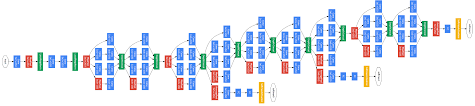

Fuente: [Geek For Geeks](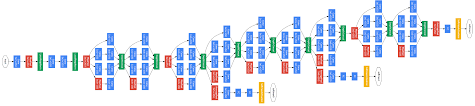)¹

#### b. DenseNet (Densely Connected Convolutional Networks) 🔗

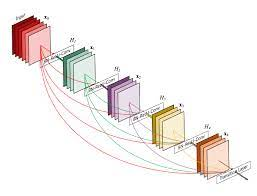

Fuente: [PyTorch](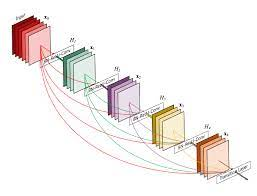)²

#### c. MobileNet 📱

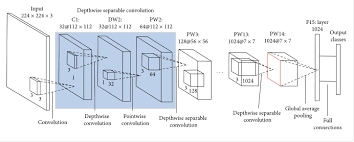

Fuente: [PyImageSearch](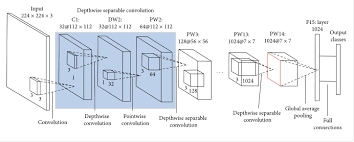)³

#### d. EfficientNet 🚀

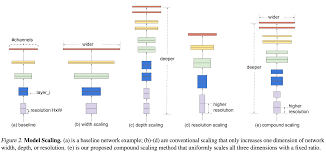

Fuente: [Papers With Code](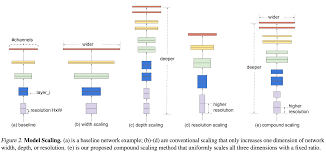)⁴

¹ Fuente de la imagen de GoogleNet (Inception) en Wikipedia.
² Fuente de la imagen de DenseNet (Densely Connected Convolutional Networks) en Medium.
³ Fuente de la imagen de MobileNet en PyImageSearch.
⁴ Fuente de la imagen de EfficientNet en Medium.